## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Reading dataset

In [2]:
sdof = pd.read_excel('data_FRF_SDOF_revised.xlsx')

In [ ]:
sdof.head()

,Freq,FRF,Magnitude,Real Part,Imaganary
0,1,4.00000017758907e-08 - 4.21940965783041e-13i,4.000000e-08,4.000000e-08,-4.219410e-13
1,21,4.00007831830571e-08 - 8.86110691174062e-12i,4.000078e-08,4.000078e-08,-8.861107e-12
2,41,4.00029854943782e-08 - 1.73021637818988e-11i,4.000299e-08,4.000299e-08,-1.730216e-11
3,61,4.00066091780886e-08 - 2.57469134732976e-11i,4.000662e-08,4.000661e-08,-2.574691e-11
4,81,4.00116550047895e-08 - 3.41971598520863e-11i,4.001167e-08,4.001166e-08,-3.419716e-11


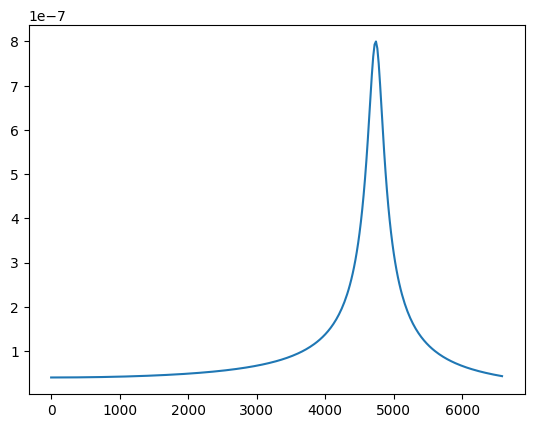

In [3]:
plt.plot(sdof['Freq'],sdof['Magnitude'])

## Natural frequency


In [4]:
x=sdof['Freq']
y=sdof['Magnitude']
from scipy.signal import find_peaks
peaks, _ = find_peaks(y)
peaks_x = np.array(x)[peaks]
peaks_y = np.array(y)[peaks]
for x_peak, y_peak in zip(peaks_x, peaks_y):
    print("Peak at (Freq, FRF):", x_peak, ",", y_peak)

Peak at (Freq, FRF): 4741 , 7.99802787299926e-07


In [5]:
data=sdof['Real Part']
mean = np.mean(data)
std = np.std(data)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 2.6044960490895863e-08
std. deviation is 1.3053810268299305e-07


In [6]:
threshold = 3
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is []


Train_test_split


In [7]:
X=sdof['Freq']
y_real=sdof['Real Part']
y_imag=sdof['Imaganary']
from sklearn.model_selection import train_test_split
X_train, X_test, y_real_train, y_real_test, y_imag_train, y_imag_test = train_test_split(X, y_real, y_imag, test_size=0.2, random_state=42)


In [8]:
X_train = np.array(X_train).reshape(-1, 1)
y_real_train = np.array(y_real_train).reshape(-1, 1)
y_real_test = np.array(y_real_test).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
y_imag_test = np.array(y_imag_test).reshape(-1, 1)
y_imag_train = np.array(y_imag_train).reshape(-1, 1)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf_real = RandomForestRegressor(n_estimators=100, random_state=42)
rf_imag = RandomForestRegressor(n_estimators=100, random_state=42)
rf_real.fit(X_train, y_real_train)
rf_imag.fit(X_train, y_imag_train)

# Step 5: Model Evaluation
y_real_pred = rf_real.predict(X_test)
y_imag_pred = rf_imag.predict(X_test)

score_real = r2_score(y_real_test, y_real_pred)
score_imag = r2_score(y_imag_test, y_imag_pred)
print("R-squared score (Real):", score_real)
print("R-squared score (Imaginary):", score_imag)

R-squared score (Real): 0.9844367385682484
R-squared score (Imaginary): 0.9940880126452468


In [ ]:
# from scipy.signal import find_peaks
# peaks, _ = find_peaks(y)
# peaks_x = np.array(x)[peaks]
# peaks_y = np.array(y)[peaks]
# for x_peak, y_peak in zip(peaks_x, peaks_y):
#     print("Peak at (Freq, FRF):", x_peak, ",", y_peak)

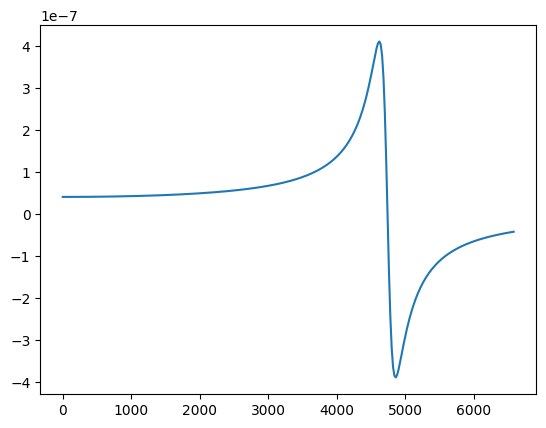

In [11]:
plt.plot(sdof['Freq'],sdof['Real Part'])

# Minimum and maximum value




In [12]:
# Find the index of the minimum value (minima)
min_index = np.argmin(y_real)
min_x = X[min_index]
min_y = y_real[min_index]

# Find the index of the maximum value (maxima)
max_index = np.argmax(y_real)
max_x = X[max_index]
max_y = y_real[max_index]

print("Minima at (Freq, FRF_real):", min_x, ",", min_y)
print("Maxima at (Freq, FRF_real):", max_x, ",", max_y)


Minima at (Freq, FRF_real): 4861 , -3.90029592633421e-07
Maxima at (Freq, FRF_real): 4621 , 4.10241489079422e-07


## Damping ratio(mathematical)

In [13]:
# finding damping ratio using real part of frf
Damping_ratio=(min_x-max_x)/(2*x_peak)
Damping_ratio

0.025311115798354777

## Half power method

In [14]:
# calulation of damping ratio mathematically using Half-power method
magnitude=sdof['Magnitude']
frequency=sdof['Freq']
resonant_index = np.argmax(magnitude)
# Find the half-power points on either side of the resonant peak
half_power = y_peak / np.sqrt(2)
left_index = np.argmin(np.abs(magnitude[:resonant_index] - half_power))
right_index = np.argmin(np.abs(magnitude[resonant_index:] - half_power)) + resonant_index

# Extract the frequencies of the half-power points
f_left = frequency[left_index]
f_right = frequency[right_index]

# Calculate the damping ratio
damping_ratio = (f_right - f_left) / (2 * x_peak)
print("Damping ratio:", damping_ratio)

Damping ratio: 0.025311115798354777


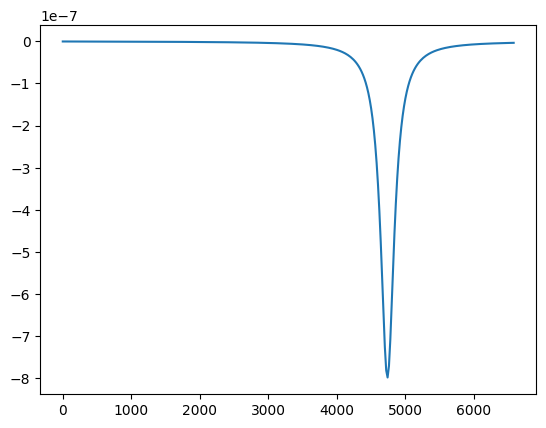

In [16]:
plt.plot(sdof['Freq'],sdof['Imaganary'])

In [17]:
min_index = np.argmin(y_imag)
min_x1 = X[min_index]
min_y1 = y_imag[min_index]
print("Minima at (Freq, FRF_imag):", min_x1, ",", min_y1)

Minima at (Freq, FRF_imag): 4741 , -7.99774316385367e-07


## Spring constant(mathematical)

In [18]:
spring_constant= -1/(2*min_y1*Damping_ratio)
spring_constant

24699676.223596342

In [ ]:
# Frf=((x_peak)**2/spring_constant)/(((x_peak**2)-(sdof['Freq'][230])**2)+1j*2*Damping_ratio*x_peak*sdof['Freq'][230])
# Frf

In [ ]:
# mathematically I AM GETTING ALL VALUES CORRECT
#  BUT for mathematical we are assuming ideal case which in not in experimental so
# Now need to find experimentally

## Curve fitting

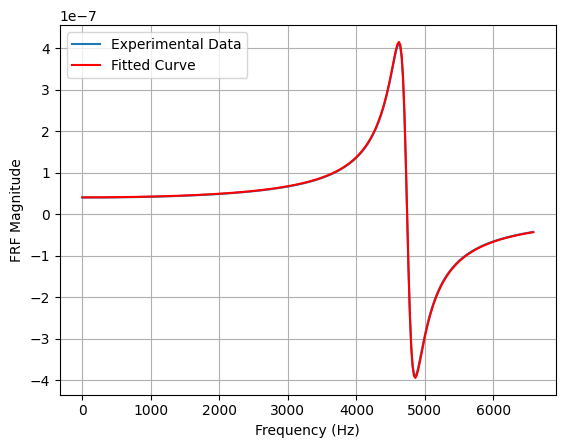

Fitted Parameters:
Natural Frequency (w_n0): 4741.00 rad/s
Damping Ratio (ζ): 0.0250
Spring Constant (k): 24699676.00 N/m


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Example FRF data (frequency and magnitude)
frequency = sdof['Freq']  # Frequency values (Hz)
frf_magnitude = sdof['Real Part']  # FRF magnitude

# Custom model function
def custom_model(f, w_n0, zeta, k):
    # w_n = w_n0 / np.sqrt(1 - zeta**2)
    return (w_n0**2/k) / ((w_n0**2 - f**2) + (1j*2 * zeta * w_n0 * f))

# Perform curve fitting with bounds and improved initial guess
p0 = [x_peak, 0.025, 24699676]  # Initial guess for parameters [w_n0, zeta, k]
lower_bounds = [0, 0, 0]  # Lower bounds for the parameters
upper_bounds = [np.inf, 1, np.inf]  # Upper bounds for the parameters
bounds = (lower_bounds, upper_bounds)

params, params_covariance = curve_fit(custom_model, frequency, frf_magnitude, p0=p0, bounds=bounds)

# Extract fitted parameters
w_n0_fit, zeta_fit, k_fit = params

# Plot the experimental data and the fitted curve
plt.plot(frequency, frf_magnitude, label='Experimental Data')
plt.plot(frequency, custom_model(frequency, *params), 'r-', label='Fitted Curve')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FRF Magnitude')
plt.legend()
plt.grid()
plt.show()

# Print the fitted parameters and calculated constants
print("Fitted Parameters:")
print("Natural Frequency (w_n0): {:.2f} rad/s".format(w_n0_fit))
print("Damping Ratio (ζ): {:.4f}".format(zeta_fit))
print("Spring Constant (k): {:.2f} N/m".format(k_fit))


## Damping ratio and spring constant using multivariate netwon method

In [21]:
import numpy as np
from scipy.optimize import minimize

# Given natural frequency and complex FRF data
natural_frequency = sdof['Freq']  # Replace with the actual natural frequency
complex_FRF = sdof['Real Part']+1j*sdof['Imaganary']       # Replace with the actual complex FRF data
peak_frequency=x_peak
# Define your FRF equation
def frf_equation(parameters, peak_frequency):
    zeta, k_x = parameters
    omega = 2 * np.pi * natural_frequency
    omega_n = 2 * np.pi * peak_frequency

    numerator = (omega_n ** 2 / k_x) / (omega_n ** 2 - omega ** 2 + 1j * 2 * zeta * omega_n * omega)
    return numerator

# Define the function that calculates the difference between observed and expected FRF
def function_to_minimize(parameters, peak_frequency, complex_FRF):
    expected_FRF = frf_equation(parameters, peak_frequency)
    residuals = np.abs(expected_FRF - complex_FRF)
    return np.sum(residuals ** 2)  # Objective to minimize

# Choose initial guesses for damping ratio and spring constant
initial_guess = [0.1, 1000]  # Replace with your initial guesses

# Use a numerical optimization method (e.g., minimize) to estimate parameters
result = minimize(
    function_to_minimize,
    initial_guess,
    args=(peak_frequency, complex_FRF),
    method='Nelder-Mead'  # Choose an appropriate optimization method
)

# The result will contain the estimated parameters [zeta, k_x]
estimated_parameters = result.x
estimated_damping_ratio = estimated_parameters[0]
estimated_spring_constant = estimated_parameters[1]

print("Estimated Damping Ratio:", estimated_damping_ratio)
print("Estimated Spring Constant:", estimated_spring_constant)


Estimated Damping Ratio: 0.025007384118313734
Estimated Spring Constant: 24999225.46147909


In [22]:
absolute_error_damping = abs(estimated_damping_ratio -damping_ratio)
print("Absolute Error damping:", absolute_error_damping)

Absolute Error: 0.00030373168004104237
